In [1]:
import os
os.getcwd()
os.chdir("../..")
os.getcwd()

'C:\\Users\\omris\\OneDrive\\python\\me_toolbox'

# Multipul Bolts strength calculations

<table><tr>
<td> 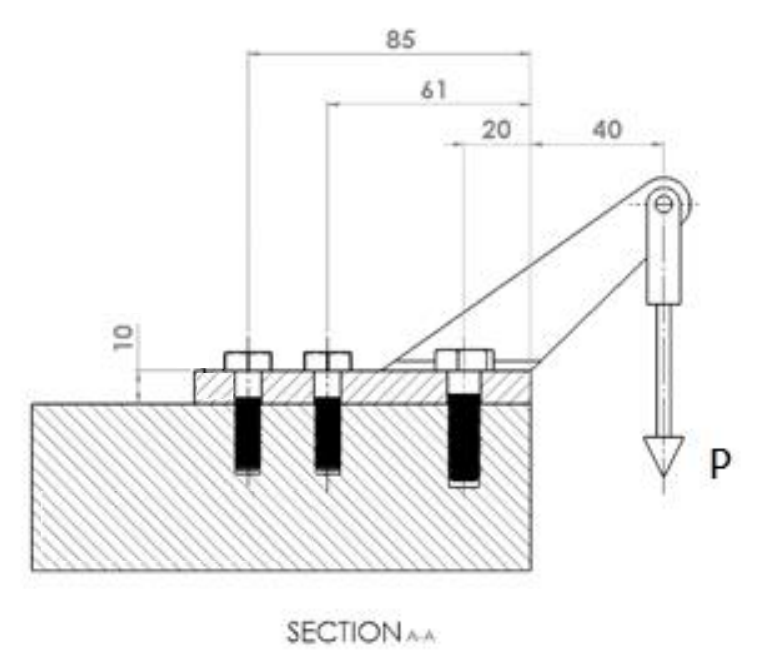 </td>
<td> 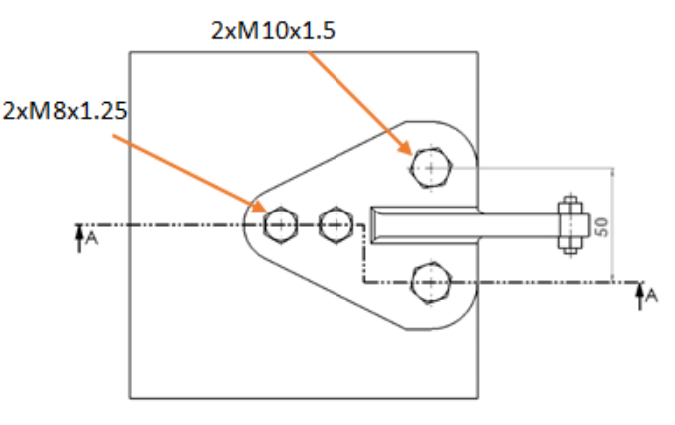 </td>
<td> 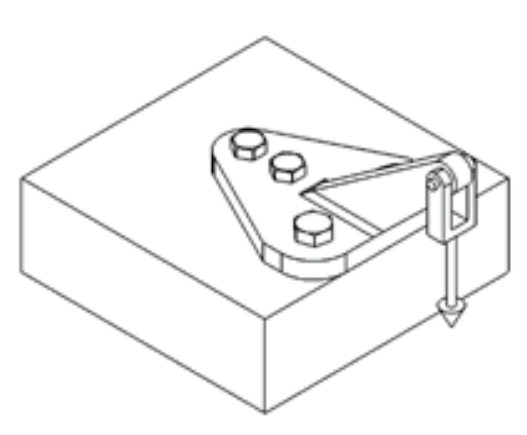 </td>
</tr></table>

A force P of 8140$[N]$ is applied as shown in the images above,
The bracket and the bolts are made of steel with an elastic modulus of 207$[GPa]$,
The bottom substrate is made out of Aluminum with am elastic modulus of 76$[GPa]$,
The bolts are grade 5.8, the preload force on The M10 bolts is 18750$[N]$ and the preload force on The M8 bolt is 11812.5$[N]$, the length of the M10 bolts is 33$[mm]$
and the length of the M8 bolts is 30$[mm]$

Importing the relevant Classes

In [2]:
from me_toolbox.fasteners import ThreadedFastener
from me_toolbox.fasteners import Bolt
from me_toolbox.fasteners import BoltPattern

## Defining the substrate layers

List of substrates thicknesses (in mm)

In [3]:
thickness = [10, 50]

List of substrates elasticity (in Mpa)

In [4]:
elastic = [207e3, 76e3]

Making a list made of the substrate thickness and elasticity pairs <br>
$[[mm,MPa],[mm,MPa]]$

In [5]:
layers = [[t, E] for t, E in zip(thickness, elastic)]  # [[25,153e3], [7,128e3], [25,207e3]]

import inflect
p = inflect.engine()

for i, layer in enumerate(layers):
    print(f"{p.ordinal(i+1)} layer: {layer[0]}mm , {layer[1]} MPa")

1st layer: 10mm , 207000.0 MPa
2nd layer: 50mm , 76000.0 MPa


## Prepering an M10 Fastener

M10 Bolt properties

In [6]:
diameter = 10 # [mm]
pitch = 1.5 # [mm]
length = 33 # [mm]
threaded_length = 26 # [mm]
grade = '5.8'
E = 207e3 # [MPa]

Using Bolt's built-in method to get the strength properties (in MPa) out of the grade and diameter

In [7]:
Sy, Sut, Sp = Bolt.get_strength_prop(diameter, grade)

print(f"Proof Strength - Sp = {Sp} [MPa]\n"
    f"Ultimate Tensile Strength - Sut = {Sut} [MPa]\n"
    f"Yield Strength - Sy = {Sy} [MPa]")


Proof Strength - Sp = 380 [MPa]
Ultimate Tensile Strength - Sut = 520 [MPa]
Yield Strength - Sy = 420 [MPa]


Defining a bolt object

In [8]:
M10 = Bolt(diameter, pitch, length, threaded_length, Sy, Sut, Sp, E)

Defining an M10 threaded fastener object

In [9]:
M10_fastener = ThreadedFastener(M10, layers, nut=False, preload=18750)

***

***Estimating the preload***<br>
**In this case the preload is specified** but we can also use the<br>
Bolt's object built-in function to return an estimated preload.<br>
If the bolt is ment to be reused then the estimated preload is 75% of the bolt's proof load,<br>
If the bolt is not ment to be reused then the estimated preload is 90% of the bolt's proof load.

In [10]:
M10_estimated_preload = M10.estimate_preload(reused=True)
print(f"M10 Estimated Preload for a reused bolt = {M10_estimated_preload:.2f}[N]")
M10_estimated_preload = M10.estimate_preload(reused=False)
print(f"M10 Estimated Preload for a permenant bolt= {M10_estimated_preload:.2f}[N]")

M10 Estimated Preload for a reused bolt = 16527.04[N]
M10 Estimated Preload for a permenant bolt= 19832.44[N]


***

## Prepering an M8 Fastener

M8 Bolt properties

In [11]:
diameter = 8 # [mm]
pitch = 1.25 # [mm]
length = 30 # [mm]
threaded_length = 22 # [mm]
grade = '5.8'
E = 207e3 # [MPa]

Using Bolt's built-in method to get the strength properties (in MPa) out of the grade and diameter

In [12]:
Sy, Sut, Sp = Bolt.get_strength_prop(diameter, grade)

print(f"Proof Strength - Sp = {Sp} [MPa]\n"
    f"Ultimate Tensile Strength - Sut = {Sut} [MPa]\n"
    f"Yield Strength - Sy = {Sy} [MPa]")


Proof Strength - Sp = 380 [MPa]
Ultimate Tensile Strength - Sut = 520 [MPa]
Yield Strength - Sy = 420 [MPa]


Defining a bolt object

In [13]:
M8 = Bolt(diameter, pitch, length, threaded_length, Sy, Sut, Sp, E)

Defining an M8 threaded fastener object

In [14]:
M8_fastener = ThreadedFastener(M8, layers, nut=False, preload=11812.5)

## Creating the Bolt Pattern

Making a list of the fasteners and another list of their locations in the pattern.

In [15]:
fasteners = [M10_fastener, M10_fastener, M8_fastener, M8_fastener]
fasteners_locations = [[-20, 20, 0], [-20, -20, 0], [-61, 0, 0], [-85, 0, 0]]

The vector sum of the external forces

In [16]:
force = [0, 0, -8140]  # [N]

The location where the force is applied

In [17]:
force_location = [40, 0, 0]

List containing two points which discribs the position and direction of the axis of rotation,<br>
That is the axis in which to bolted part want to rotate around when the force is applied.

In [18]:
axis_of_rotation = [[0, 0], [0, 1]]

In [19]:
pattern = BoltPattern(fasteners, fasteners_locations, force, force_location, axis_of_rotation, 'shank')

## Analysis

### Some parameters

In [20]:
print(f"M8 Bolt: \nShank Length - ld = {M8.shank_length}[mm]\n" 
      f"Griped Thread length - lt = {M8_fastener.griped_thread_length}[mm]\n"
      f"Nominal Area - Ad = {M8.nominal_area:.2f}[mm^2]\n"
      f"Stress Area - At = {M8.stress_area:.2f}[mm^2]\n"
      f"Bolt Stiffness - kb = {M8_fastener.bolt_stiffness*1e-3:.2f} [kN/mm]\n"
      f"member stiffness - km = {M8_fastener.member_stiffness*1e-3:.2f} [kN/mm]\n"
      f"fastener stiffness - C = {M8_fastener.fastener_stiffness:.3f}")

M8 Bolt: 
Shank Length - ld = 8[mm]
Griped Thread length - lt = 6.0[mm]
Nominal Area - Ad = 50.27[mm^2]
Stress Area - At = 36.61[mm^2]
Bolt Stiffness - kb = 640.77 [kN/mm]
member stiffness - km = 1202.73 [kN/mm]
fastener stiffness - C = 0.348


In [21]:
print(f"M10 Bolt: \nShank Length - ld = {M10.shank_length}[mm]\n" 
      f"Griped Thread length - lt = {M10_fastener.griped_thread_length}[mm]\n"
      f"Nominal Area - Ad = {M10.nominal_area:.2f}[mm^2]\n"
      f"Stress Area - At = {M10.stress_area:.2f}[mm^2]\n"
      f"Bolt Stiffness - kb = {M10_fastener.bolt_stiffness*1e-3:.2f} [kN/mm]\n"
      f"member stiffness - km = {M10_fastener.member_stiffness*1e-3:.2f} [kN/mm]\n"
      f"fastener stiffness - C = {M10_fastener.fastener_stiffness:.3f}")

M10 Bolt: 
Shank Length - ld = 7[mm]
Griped Thread length - lt = 8.0[mm]
Nominal Area - Ad = 78.54[mm^2]
Stress Area - At = 57.99[mm^2]
Bolt Stiffness - kb = 911.56 [kN/mm]
member stiffness - km = 1577.26 [kN/mm]
fastener stiffness - C = 0.366


### Finding forces and stresses

Total shear forces $(F_{i})$ and shear stress $(τ)$ in each fastener.

In [22]:
for i, shear_force in enumerate(pattern.total_shear_force):
    print(f"{pattern.fasteners[i]} - Fi_{i+1} = [{shear_force[0]:.2f}, {shear_force[1]:.2f}, {shear_force[2]:.2f}][N]")

print(f"\nshear stress - τ = {["%.2f" % stress for stress in pattern.shear_stress]} [MPa]")

Fastener(M10) - Fi_1 = [0.00, 0.00, 0.00][N]
Fastener(M10) - Fi_2 = [0.00, 0.00, 0.00][N]
Fastener(M8) - Fi_3 = [0.00, 0.00, 0.00][N]
Fastener(M8) - Fi_4 = [0.00, 0.00, 0.00][N]

shear stress - τ = ['0.00', '0.00', '0.00', '0.00'] [MPa]


Fastener Load $(P)$, Bolt Load $(F_{b})$, Normal stress $(σ)$ and Equivalent stress $(σ_{eq})$

In [23]:
print(f"Fastener Load     - P    = {["%.2f" % load for load in pattern.fastener_load]}\n"
      f"Bolt Load         - Fb   = {["%.2f" % load for load in pattern.bolt_load]}\n"
      f"Normal stress     - σ    = {["%.2f" % stress for stress in pattern.normal_stress]}\n")
      

Fastener Load     - P    = ['829.39', '829.39', '1676.62', '3017.67']
Bolt Load         - Fb   = ['19053.77', '19053.77', '12395.26', '12861.38']
Normal stress     - σ    = ['328.57', '328.57', '338.59', '351.32']



The equivalent stresses on each bolt $( σ_{eq}^i=\sqrt{σ_{i}^2+3τ_{i}^2} )$

In [24]:
print(f"Equivalent stress - σ_eq = {["%.2f" % stress for stress in pattern.equivalent_stresses]}\n")

print(f"just to clearify every item in the list is the equivalent stress for each fastener:")
for i, stress in enumerate(pattern.equivalent_stresses):
    print(f"{pattern.fasteners[i]} - σ_eq_{i+1} = {stress:.2f}[MPa]")


Equivalent stress - σ_eq = ['328.57', '328.57', '338.59', '351.32']

just to clearify every item in the list is the equivalent stress for each fastener:
Fastener(M10) - σ_eq_1 = 328.57[MPa]
Fastener(M10) - σ_eq_2 = 328.57[MPa]
Fastener(M8) - σ_eq_3 = 338.59[MPa]
Fastener(M8) - σ_eq_4 = 351.32[MPa]


### Finding safty factors ###

#### Seperation Safety Factor - $n_{0}$
Is the non-separation safety factor between the substrates,<br>
which is a necessary condition for the fastener to function.

In [25]:
print(f"Seperation safty factors:")
n0_min = pattern.separation_safety_factor(minimal_value=True, verbose=True)
print(f"The lowest np value: {round(n0_min,2)}")

Seperation safty factors:
Fastener(M10) - n0 = 35.67
Fastener(M10) - n0 = 35.67
Fastener(M8) - n0 = 10.80
Fastener(M8) - n0 = 6.00

The lowest np value: 6.0


#### Load Safety Factor - $n_{L}$
Means how many times the external load (P) can be multiply until reaching<br>
the proof strength (Sp) of the bolt.

In [26]:
print(f"Load safty factors:")
nL_min = pattern.load_safety_factor(minimal_value=True, verbose=True)
print(f"The lowest nL value: {round(nL_min,2)}")

Load safty factors:
Fastener(M10) - nL = 10.82
Fastener(M10) - nL = 10.82
Fastener(M8) - nL = 3.60
Fastener(M8) - nL = 2.00

The lowest nL value: 2.0


#### Proof Safety Factor - $n_{p}$
Means how many times the Bolt load ($F_{b}$) can be multiply until reaching<br>
the proof strength (Sp) of the bolt.

In [27]:
print(f"Proof safty factors:")
np_min = pattern.proof_safety_factor(minimal_value=True, verbose=True)
print(f"The lowest np value: {round(np_min,2)}")

Proof safty factors:
Fastener(M10) - np = 1.16
Fastener(M10) - np = 1.16
Fastener(M8) - np = 1.12
Fastener(M8) - np = 1.08

The lowest np value: 1.08


### Location of neutral point

In [28]:
pattern.neutral_point

(-42.5526853529465, 0.0, 0.0)